Лаб 1

In [ ]:
from PIL import Image
from PIL import ImageDraw
import random

In [ ]:
width, height = 600, 600 
newImage = Image.new("RGB", (width, height))
draw = ImageDraw.Draw(newImage)

In [ ]:
draw.rectangle(((0, 0), (width, height * 0.8)), '#0e2d7d') #фон основной 

In [ ]:
def random_points(draw_to_Image, num_points, width, height):
    points = []
    for _ in range(num_points):
        x = random.randint(0, width)
        y = random.randint(0, height)
        points.append((x, y))
    for point in points:
        draw_to_Image.rectangle((point, (point[0] + 2, point[1] + 2)), '#e2ff91')

In [ ]:
def draw_tree(draw_to_Image, width, height, x, y):

    trunk_x = int(0.138 * width) + x
    trunk_y = int(0.93 * height) + y- 17
    trunk_width = int(0.03 * width)
    trunk_height = int(0.06 * height)
    tree_trunk = ((trunk_x, trunk_y), (trunk_x + trunk_width, trunk_y + trunk_height))
    
    draw_to_Image.polygon(( (int(0.1 * width) + x, int(0.9 * height) + y), 
        (int(0.15 * width) + x, int(0.7 * height) + y),
        (int(0.2 * width) + x, int(0.9 * height) + y)), '#1e6428')
    draw_to_Image.rectangle(tree_trunk, 'brown')

In [ ]:
class Tree:
    def __init__(self, draw_to_Image, width, height, x, y):
        self.draw = draw_to_Image
        self.width = width
        self.height = height
        self.x = x
        self.y = y
    
    def draw_trunk(self):
        trunk_x = int(0.138 * self.width) + self.x
        trunk_y = int(0.4 * self.height) + self.y - 17
        trunk_width = int(0.03 * self.width)
        trunk_height = int(0.06 * self.height)
        tree_trunk = ((trunk_x, trunk_y), (trunk_x + trunk_width, trunk_y + trunk_height))
        self.draw.rectangle(tree_trunk, 'brown')
    
    def draw_top(self):
        tree_top_points = [
            (int(0.1 * self.width) + self.x, int(0.4 * self.height) + self.y),
            (int(0.15 * self.width) + self.x, int(0.2 * self.height) + self.y),
            (int(0.2 * self.width) + self.x, int(0.4 * self.height) + self.y),
        ]
        self.draw.polygon(tree_top_points, '#1e6428')

    def draw_tree(self):
        self.draw_trunk()
        self.draw_top()
        


In [ ]:
class House:
    def __init__(self, width, height, draw_image):
        self.width = width
        self.height = height
        self.draw = draw_image
    
    def draw_house(self, count_floors):
        #  крыша
        self.draw.polygon(((int(0.3 * width), int(0.4 * height)), 
                (int(0.7 * width), int(0.4 * height)),
                (int(0.5 * width), int(0.3 * height))),
                '#858585')
        
        # труба
        self.draw.rectangle(((int(0.55 * width), int(0.36 * height) - int(0.06 * height)), 
                        (int(0.55 * width) + int(0.03 * width), int(0.36 * height) - int(0.06 * height) + int(0.06 * height)  )), 
                        'brown',outline='black')
        # этажи
        self._draw_floors(count_floors)
    
        # дверь  
        self.draw.rectangle(((int(0.485 * width), int(0.89 * height) - int(0.06 * height)), 
                        (int(0.485 * width) + int(0.03 * width), int(0.89 * height) - int(0.06 * height) + int(0.06 * height)  )), 
                        'brown',outline='black')
        
    def _draw_floors(self, count):
    # Рисуем дом
        for i in range(count):
            self.draw.rectangle(((int(0.3 * self.width), int((0.4 + 0.1 * i) * self.height)), 
                            (int(0.7 * self.width), int((0.5 + 0.1 * i) * self.height))), '#935a52')
            if i % 2 == 0:  # Если четный этаж, рисуем свет в окнах
                colors = ('yellow', '#595959') * 2
            else:
                colors = ('#595959', 'yellow') * 2
            for j, x_start in enumerate([0.31, 0.41, 0.53, 0.61]):
                self._draw_window(x_start, x_start + 0.06, i, colors[j])

    def _draw_window(self, x_start, x_end, count, color):
        window_coords = ((int(x_start * self.width), int((0.42 + 0.1 * count) * self.height)), 
                        (int(x_end * self.width), int((0.48 + 0.1 * count) * self.height)))
        self.draw.rectangle(window_coords, color, outline='black')


In [ ]:
def month(draw_to_img):
    draw_to_img.ellipse(((20, 20),
                  (int(0.2 * width), int(0.2 * height))),'orange')
    draw_to_img.ellipse(((40, 20),
                  (int(0.2 * width), int(0.2 * height))),'#0e2d7d')

In [ ]:
random_points(draw,50, width, height)# звезды

draw.rectangle(((0, height * 0.8), (width, height)), (18, 122, 67)) # трава

# месяц
month(draw)

# ели
tree =Tree(draw,width,height,30,250)
tree.draw_tree()

tree =Tree(draw,width,height,400,300)
tree.draw_tree()
# дом
house = House(width,height,draw)
house.draw_house(5)
    


newImage.save('res.jpg') 

In [ ]:
newImage

.


.

 .

.

Лаб 2

1. Поменяйте цвета своих изображений на противоположные в RGB
используя прямые вычисления значений для каждого из канал

In [ ]:
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [ ]:
def img_show(imgs, title='', ax=None):
    ax.imshow(imgs)
    ax.set_title(title)
    

In [ ]:
def imgs_show(count, imgs, titles):
    # Создаем сетку графиков с указанным количеством столбцов
    fig, axs = plt.subplots(1, count, figsize=(15, 10))
    
    # Проходимся по каждому изображению и его заголовку
    for i in range(count):
        # Отображаем изображение с указанным заголовком
        img_show( imgs[i], titles[i], axs[i])
        


In [ ]:
url_img2_1 = "https://images.unsplash.com/photo-1707879487614-72b421e4393f?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
url_img2_2 = "https://images.unsplash.com/photo-1682687982029-edb9aecf5f89?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
url_img2_3 = "https://images.unsplash.com/photo-1659347257477-c965ea8aff9d?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

In [ ]:
img2_1 = Image.open(urlopen(url_img2_1))
img2_2 = Image.open(urlopen(url_img2_2))
img2_3 = Image.open(urlopen(url_img2_3))

In [ ]:
def the_opposite_colors(img):
    # Получаем размеры изображения
    width, height = img.size

    # Создаем новое изображение с такими же размерами и пустым фоном
    new_img = Image.new("RGB", (width, height))

    # Проходим по каждому пикселю изображения
    for x in range(width):
        for y in range(height):
            # Получаем значения RGB для текущего пикселя
            r, g, b = img.getpixel((x, y))
            
            # Инвертируем значения RGB
            inverted_r = 255 - r
            inverted_g = 255 - g
            inverted_b = 255 - b
            
            # Устанавливаем новые значения RGB для пикселя в новом изображении
            new_img.putpixel((x, y), (inverted_r, inverted_g, inverted_b))
    
    return new_img


In [ ]:
inverted_img = the_opposite_colors(newImage)
imgs_show(2, [newImage, inverted_img], ['до инверсии цветов', 'после инверсии цветов'])

In [ ]:
inverted_img1 = the_opposite_colors(img2_1)
imgs_show(2,[img2_1,inverted_img1],['до инверсии цветов','после инверсии цветов'])

In [ ]:
inverted_img2 = the_opposite_colors(img2_2)
imgs_show(2,[img2_2,inverted_img2],['до инверсии цветов','после инверсии цветов'])

In [ ]:
inverted_img3 = the_opposite_colors(img2_3)
imgs_show(2,[img2_3,inverted_img3],['до инверсии цветов','после инверсии цветов'])

2. Получите инвертированные по цвету изображения с использованием
метода invert из модуля ImageOps 

In [ ]:
from PIL import ImageOps

In [ ]:
inverted_auto_img = ImageOps.invert(newImage)

imgs_show(3,[newImage,
             inverted_img, 
             inverted_auto_img],
             ['до инверсии цветов',
              'после инверсии цветов',
              'с использованием invert'])

In [ ]:
inverted_auto_img1 = ImageOps.invert(img2_1)

imgs_show(3,[img2_1,
             inverted_img1, 
             inverted_auto_img1],
             ['до инверсии цветов',
              'после инверсии цветов',
              'с использованием invert'])

In [ ]:
inverted_auto_img2 = ImageOps.invert(img2_2)

imgs_show(3,[img2_2,
             inverted_img2, 
             inverted_auto_img2],
             ['до инверсии цветов',
              'после инверсии цветов',
              'с использованием invert'])

In [ ]:
inverted_auto_img3 = ImageOps.invert(img2_3)

imgs_show(3,[img2_3,
             inverted_img3, 
             inverted_auto_img3],
             ['до инверсии цветов',
              'после инверсии цветов',
              'с использованием invert'])

3. Получите Grayscale-изображения (в градациях серого) с использованием
метода grayscale из модуля ImageOps библиотеки PIL, а затем раскрасьте
полученные изображения методом colorize из того же модуля, используя в
качестве пары базовых цветов не белый и черный, какой-то другой набор. Затем поменяйте эти цвета местами, проанализируйте полученные
результаты, сделайте выводы. Попробуйте после colorize использовать метод
invert из модуля ImageOps, что получится в этом случае ?

In [ ]:
def img_scale(img):
    # Получение Grayscale-изображения из оригинального
    grayscale_img = ImageOps.grayscale(img)

    # Раскрашиваем Grayscale-изображение
    colorized_img = ImageOps.colorize(grayscale_img, "#FF5733", "#3333FF")

    # Меняем цвета местами и снова раскрашиваем
    colorized_swapped_img = ImageOps.colorize(grayscale_img, "#3333FF", "#FF5733")

    imgs_show(4,[img,
                 grayscale_img,
                 colorized_img, 
                 colorized_swapped_img],
                 ['img',
                'grayscale_img',
                'colorized_img',
                'colorized_swapped_img'])

In [ ]:
img_scale(newImage)

In [ ]:
img_scale(img2_1)

In [ ]:
img_scale(img2_2)

In [ ]:
img_scale(img2_3)

4. Используя метод transpose, поверните свои изображения на 90 градусов
против часовой стрелки

In [ ]:
imgs_show(4, [newImage.transpose(Image.ROTATE_90),
              img2_1.transpose(Image.ROTATE_90),
              img2_2.transpose(Image.ROTATE_90), 
              img2_3.transpose(Image.ROTATE_90)],
          ['', '', '', ''])

5. Создайте bmp-изображения с 8, 12, 16 и 24 цветами из ранее полученных
картинок.


In [ ]:
def bmp_image(img, count):
    return img.convert("P", palette=Image.ADAPTIVE, colors=count)

In [ ]:
imgs_show(2, [bmp_image(newImage,8),
              bmp_image(newImage,12)
              ],
              ['', ''])
imgs_show(2, [
              bmp_image(newImage,16), 
              bmp_image(newImage,24)
              ],
              ['', ''])

In [ ]:
imgs_show(2, [bmp_image(img2_1,8),
              bmp_image(img2_1,12)
              ],
              ['', ''])
imgs_show(2, [
              bmp_image(img2_1,16), 
              bmp_image(img2_1,24)
              ],
              ['', ''])

In [ ]:
imgs_show(2, [bmp_image(img2_2,8),
              bmp_image(img2_2,12)
              ],
              ['', ''])
imgs_show(2, [
              bmp_image(img2_2,16), 
              bmp_image(img2_2,24)
              ],
              ['', ''])

In [ ]:
imgs_show(2, [bmp_image(img2_3,8),
              bmp_image(img2_3,12)
              ],
              ['', ''])
imgs_show(2, [
              bmp_image(img2_3,16), 
              bmp_image(img2_3,24)
              ],
              ['', ''])

.

.

.

.

Лаб 3

1. Возьмите полученную в 1-й лабораторной работе картинку и переведите её
в grayscale-режим (Y = 0.2126⋅ R + 0.7152⋅ G + 0.0722⋅ B), далее
используйте это преобразованное изображение вместе с тремя
полутоновыми картинками с образовательного портала

In [ ]:
# Преобразуем изображение в Grayscale с помощью указанной формулы
def to_grayscale(set_img):
    img = set_img.convert("RGB")
    width, height = img.size
    for x in range(width):
        for y in range(height):
            r, g, b = img.getpixel((x, y))
            # Применяем формулу для преобразования в Grayscale
            gray = int(0.2126 * r + 0.7152 * g + 0.0722 * b)
            img.putpixel((x, y), (gray, gray, gray))
    return img

In [ ]:
img3_1 = to_grayscale(newImage)


imgs_show(2, [
              newImage, 
              img3_1
              ],
              ['', ''])


In [ ]:
img3_2 = Image.open(r"C:\Users\nikit\OneDrive\Рабочий стол\ро\Coins.jpg")
img3_3 = Image.open(r"C:\Users\nikit\OneDrive\Рабочий стол\ро\arch.jpg")
img3_4 = Image.open(r"C:\Users\nikit\OneDrive\Рабочий стол\ро\rice.jpg")

2. Постройте гистограммы изображений

In [ ]:
from matplotlib.pyplot import hist
import numpy as np

%matplotlib inline

In [ ]:
def hist_show(imgs, title, ax):
    ax.hist(np.ravel(imgs), bins=256)
    ax.set_title(title)
    

In [ ]:
def hists_show(imgs):
    # Создаем сетку графиков с указанным количеством столбцов
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    
    # Отображаем изображение с указанным заголовком
    img_show( imgs,'',axs[0])
    hist_show( imgs, '', axs[1])

In [ ]:
hists_show(img3_1)

In [ ]:
hists_show(img3_2)

In [ ]:
hists_show(img3_3)

In [ ]:
hists_show(img3_4)

3. Подберите и выполните логарифмические преобразования изображений с
помощью попиксельной обработки, постройте гистограммы полученных
изображений. Совет: чтобы видеть различия в исходных и получающихся картинках, располагайте их рядом, используя subplot.

In [ ]:
def img_hist_show(img, title_img, ax_hist):
    ax_hist.hist(np.ravel(img[0]), bins=256, alpha=0.5, label=title_img[0])
    ax_hist.hist(np.ravel(img[1]), bins=256, alpha=0.5, label=title_img[1])
    ax_hist.legend()
    ax_hist.set_title('Гистограмма ингтенсивности цвета')

In [ ]:
def hist_transform_show(imgs, title, ax):
    ax.hist(np.ravel(imgs), bins=256)
    ax.set_title(title)

def transform_show(imgs):
    # Создаем сетку графиков с указанным количеством столбцов
    fig, axs = plt.subplots(1, 3, figsize=(30, 10))

    # Отображаем изображение с указанным заголовком
    img_show( imgs[0],'',axs[0])
    img_show( imgs[1],'',axs[1])
    img_hist_show(imgs,['оригинальное','Преобразованное'],axs[2])

In [ ]:
def transform(f, img):
    img_copy = img.copy() # Преобразовывать будем копию исходного изображения
    draw = ImageDraw.Draw(img_copy) #Создаем инструмент для рисования
    width = img_copy.size[0] #Определяем ширину
    height = img_copy.size[1] #Определяем высоту 
    pixels = img_copy.load() #Выгружаем значения пикселей
    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i, j]
            S = tuple(map(f, (r, g, b)))
            draw.point((i, j), S)

    transform_show([img,img_copy])

In [ ]:
def f_log(x):
    c = 35
    return int(c * np.log(x + 1))

In [ ]:
transform(f_log, img3_1)

In [ ]:
transform(f_log, img3_2)

In [ ]:
transform(f_log, img3_3)

In [ ]:
transform(f_log, img3_3)

In [ ]:
transform(f_log, img3_4)

4. Подберите степенные преобразования и выполните гамма-коррекцию
изображений, постройте гистограммы полученных изображений. Что можно
сказать про результаты преобразований? Что дает анализ гистограмм

In [ ]:
def f_gamma(x):
 c = 0.0001
 return min(255, int(c * x**2.5))


In [ ]:
transform(f_gamma, img3_1)

In [ ]:
transform(f_gamma, img3_2)

In [ ]:
transform(f_gamma, img3_3)

In [ ]:
transform(f_gamma, img3_4)

5. Поэкспериментируйте с кусочно-линейными преобразованиями вид

1е кусочно-линейных преобразование

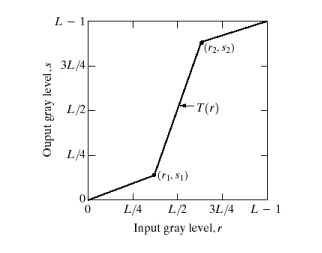

In [ ]:
def f1(x): 
    x1 = 50
    x2 = 60
    if x < x1 or x > x2:
        return int(2 * x)
    return int(0.5 * x)

In [ ]:
transform(f1, img3_1)

In [ ]:
transform(f1, img3_2)

In [ ]:
transform(f1, img3_3)

In [ ]:
transform(f1, img3_4)

2е кусочно-линейных преобразование

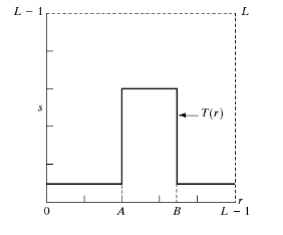

In [ ]:
def f2(x): # интервальная бинаризация 
    x1 = 50
    x2 = 150
    if x2 > x > x1:
        return 255
    return 0

In [ ]:
transform(f2, img3_1)

In [ ]:
transform(f2, img3_2)

In [ ]:
transform(f2, img3_3)

In [ ]:
transform(f2, img3_4)

3е кусочно-линейных преобразование

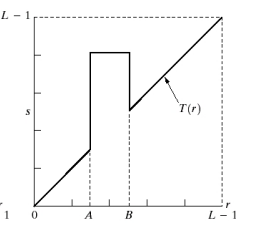

In [ ]:
def f3(x): 
    x1 = 50
    x2 = 100
    if x2 > x > x1:
        return int(255)
    return int(x)

In [ ]:
transform(f3, img3_1)

In [ ]:
transform(f3, img3_2)

In [ ]:
transform(f3, img3_3)

In [ ]:
transform(f3, img3_4)

6. Попробуйте выполнить пороговую сегментацию для многопиковых
гистограмм, локализуйте отдельные объекты на изображениях с ее помощью. Что можно сказать про результаты преобразований? Что дает анализ
гистограмм?

In [ ]:
def f_bin(x):
    return 0 if x in range(95, 110) else 255



In [ ]:
transform(f_bin, img3_1)